# 18.06 Problem Set 9 Solutions

## Problem 1 (5+5+5+5 points)

Suppose that you have the following Markov matrix, an "absorbing" Markov matrix because once you reach state 5 you "never escape":

In [1]:
M = [ 0.899  0.5  0.1  0.5  0
      0.1    0.3  0.4  0.0  0
      0.0    0.1  0.4  0.0  0
      0.001  0.0  0.1  0.49 0
      0.0    0.1  0.0  0.01 1 ]

5×5 Matrix{Float64}:
 0.899  0.5  0.1  0.5   0.0
 0.1    0.3  0.4  0.0   0.0
 0.0    0.1  0.4  0.0   0.0
 0.001  0.0  0.1  0.49  0.0
 0.0    0.1  0.0  0.01  1.0

**(a)** Check (numerically with Julia) that $M^n x$ will eventually (for $n \to \infty$) reach a steady state for *any* $x$.   What must be true of the eigenvalues of $M$ for this to happen?

In [2]:
using LinearAlgebra
λ, X = eigen(M);

# check something about λ?

**(b)** Suppose that you start with $x = e_1 = [1,0,0,0,0]$ (i.e. in "state 1").  As we saw in class for Chutes & Ladders, the probability $p(n)$ of reaching state $e_5 = [0,0,0,0,1]$ after exactly $n$ steps is

$$
p(n) = e_5^T (M^n - M^{n-1}) e_1
$$

This is plotted below. As you can see, the probability $p(n)$ goes down *very* slowly after an initial rapid rise.  In fact, from the fact that it is almost a straight line on a semilog plot (right), the decay of $p(n)$ is approximately *exponential*:
$$
p(n) \approx (\mbox{some coefficient}) e^{-k n}
$$
for some constant $k$.   **What is $k$**, as determined from the eigenvalues of $M$?

To solve this, imagine expanding $e_1$ in the basis of eigenvectors.  What does $(M^n - M^{n-1}) e_1$ look like in that basis?  What happens when $n$ is large?

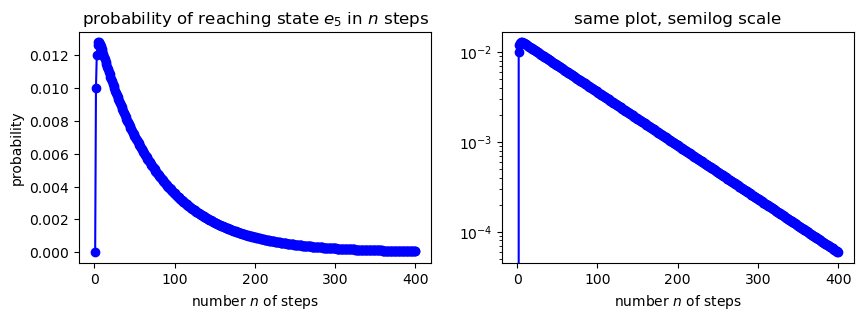

PyObject Text(0.5, 28.0, 'number $n$ of steps')

In [3]:
using PyPlot
e₁ = [1,0,0,0,0]
e₅ = [0,0,0,0,1]
n = 1:400

figure(figsize=(10,3))

subplot(1,2,1)
plot(n, [e₅'*(M^n - M^(n-1))*e₁ for n in n], "bo-")
title(L"probability of reaching state $e_5$ in $n$ steps")
xlabel(L"number $n$ of steps")
ylabel("probability")

subplot(1,2,2)
semilogy(n, [e₅'*(M^n - M^(n-1))*e₁ for n in n], "bo-")
title("same plot, semilog scale")
xlabel(L"number $n$ of steps")

**(c)** As discussed in class, the *average* number of steps to reach state $e_5$ is therefore:
$$
\sum_{n=1}^\infty n e_5^T (M^n - M^{n-1}) e_1 = e_5^T \left[ \sum_{n=1}^\infty  n (M^n - M^{n-1}) \right] e_1 \, .
$$

Suppose you are given the diagonalization
$$
M = X \begin{pmatrix} \lambda_1 & & & & \\ & \lambda_2 & & & \\ & & \lambda_3 & & \\ & & & \lambda_4 & \\ & & & & 1 \end{pmatrix} X^{-1}
$$
of $M$ (noting that one of the eigenvalues must $= 1$).  In terms of $X$ and these $\lambda_k$, give an **exact formula** for the matrix:
$$
\sum_{n=1}^\infty  n (M^n - M^{n-1}) = \; ?
$$
You may use the formulas for an [arithmetico-geometric series](https://en.wikipedia.org/wiki/Arithmetico%E2%80%93geometric_sequence) $\sum_{n=1}^\infty n r^n = r/(1-r)^2$ or for and/or for a geometric series $\sum_{n=0}^\infty r^n = 1/(1-r)$ (note the difference in starting $n$), but you may only apply these formulas to *scalars* (and be careful when $r=1$!).

**(d)** We can compute the average number of steps numerically, to a good approximation, just by summing a lot of terms:

In [4]:
# average number of steps to reach e₅, summed numerically:
sum([n * e₅'*(M^n-M^(n-1))*e₁ for n in 1:10^5])

75.11223892250649

Check that this answer **matches** $e_5^T (\mbox{your part d}) e_1$ using your answer from part (d) and the $X$ and $\lambda$ computed by Julia.

## Solution

**(a)**

In [5]:
x = rand(5) # choose random x
x = x / sum(x) # normalize x to have sum = 1
n = 10000; # choose high power of M
(M^n)*x

5-element Vector{Float64}:
 3.1689731134239033e-60
 5.126029853310557e-61
 8.741192965850824e-62
 2.399200803373035e-62
 1.000000000000001

We see that $M^nx$, for a random $x$, converges to $e_5 = [0,0,0,0,1]$ as $n\to \infty$, which makes sense since state 5 is the absorbing state. 

To check this more rigorously, we need to look at the eigenvalues (computed numerically above), and verify that $|\lambda| < 1$ except for the one eigenvalue $\lambda = 1$.  We can compute the absolute values (magnitudes) in Julia with:

In [6]:
λ # the eigenvalues

5-element Vector{ComplexF64}:
 0.10181769041350378 + 0.0im
  0.5003800408562611 - 0.04926978942324787im
  0.5003800408562611 + 0.04926978942324787im
  0.9864222278739748 + 0.0im
                 1.0 + 0.0im

In [7]:
abs.(λ) # absolute values (magnitudes |λ|) of the eigenvalues

5-element Vector{Float64}:
 0.10181769041350378
 0.5027998582310109
 0.5027998582310109
 0.9864222278739748
 1.0

The criterion for convergence to a steady state from any initial condition is that every eigenvalue $\lambda$ satisfy $\lambda=1$ or $|\lambda|<1$. In our case, we see that exactly one $\lambda$ satisfies $\lambda=1$ while the rest of the eigenvalues satisfy $|\lambda|<1$. 

**(b)**

We have $p(n)\approx (\text{some coefficient})e^{-kn}$ so to find $k$ we need to compute $-\frac{\log p(n)}{n}\approx k$, for $n$ large enough. 

Let $x_0$ be the steady state of $M$, that is, the eigenvector of $M$ with eigenvalue 1, and let $y_1,y_2,y_3,y_4$ be the remaining eigenvectors. We use the convention (as in the values computed by Julia above) that $\lambda_4$ is the second-biggest eigenvalue (by magnitude), $\lambda_3$ is the third-biggest eigenvalue, etc.

Writing 
$e_1=c_0x_0+\sum_{i=1}^4c_iy_i$ for some coefficients $c_i$, we find that $M^{n-1}e_1=c_0x_0+\sum_{i=1}^4\lambda_i^{n-1}c_iy_i$ and $M^ne_1=c_0x_0+\sum_{i=1}^4\lambda_i^nc_iy_i$. Hence
$$
(M^n-M^{n-1})e_1=\sum_{i=1}^4\lambda_i^{n-1}(\lambda_i-1)c_iy_i,
$$
where the $\lambda = 1$ term has disappeared, and
$$
e_5^T(M^n-M^{n-1})e_1=\sum_{i=1}^4\lambda_i^{n-1}(\lambda_i-1)c_ie_5^Ty_i.
$$
For $n$ large, the eigenvalues $\lambda_1^{n-1},\lambda_2^{n-1},\lambda_3^{n-1}$ are much smaller than $\lambda_4^{n-1}$ so
$$
p(n)=e_5^T(M^n-M^{n-1})e_1\approx \lambda_4^{n-1}(\lambda_4-1)c_4e_5^Ty_4.
$$
Assuming that $c_4\neq 0$ (which happens usually in practice, and also in our case as can be checked numerically), and since $p(n)\approx (\text{some coefficient})e^{-kn}$, we see that $k=-\log \lambda_4$. Let's do it a bit more carefully: For some coefficient $A$,
$$
Ae^{-nk}\approx  \lambda_4^{n-1}(\lambda_1-1)c_4e_5^Ty_4,
$$
so, taking log on both sides,
$$
-nk\approx (n-1)\log \lambda_4+\log \left(\frac{(\lambda_4-1)c_4e_5^Ty_4}{A}\right)
$$
Dividing by $-n$ on both sides, and taking $n\to\infty$, we get
$$
\boxed{k\approx -\log \lambda_4}.
$$
The numerical value of $k$ is:

In [8]:
k=-log(λ[4])

0.013670793044884364 - 0.0im

We see that $k$ is very small (because $\lambda_4$ is very close to 1) which explains why the decay rate in the plot is slow.

It is also instructive (though you were **not required** to do this to re-plot the data along with $\lambda_4^n$ to see that $\lambda_4^n = e^{-kn}$ is indeed the observed decay:

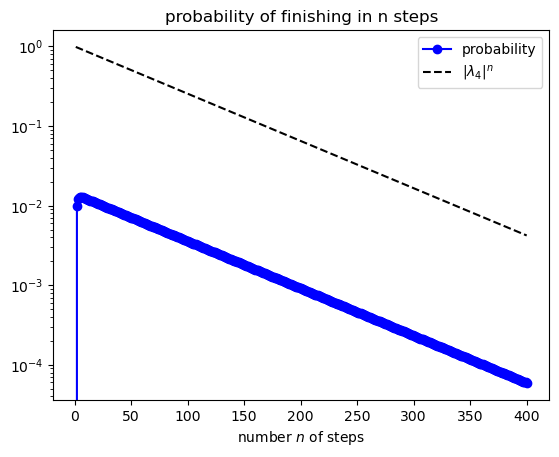

PyObject <matplotlib.legend.Legend object at 0x7fdc430f2730>

In [9]:
n = 1:400
semilogy(n, [e₅'*(M^n - M^(n-1))*e₁ for n in n], "bo-")
semilogy(n, abs(λ[4]).^n, "k--")
title("probability of finishing in n steps")
xlabel(L"number $n$ of steps")
legend(["probability", L"|\lambda_4|^n"])

**(c)**
Using the diagonalization $M=X\Lambda X^{-1}$, where $\Lambda=\text{diag}(\lambda_1,\ldots,\lambda_4,1)$, we have $M^m=X\Lambda^m X^{-1}$ for any integer $m$ so
$$
(M^n - M^{n-1})=X(\Lambda^n - \Lambda^{n-1})X^{-1}=X\text{diag}(\lambda_1^n-\lambda_1^{n-1},\ldots, \lambda_4^n-\lambda_4^{n-1}, 0)X^{-1}.
$$
Hence,
$$
\sum_{n=1}^{\infty}n(M^n - M^{n-1})=X \text{diag}\left(\sum_{n=1}^{\infty}n(\lambda_1^n-\lambda_1^{n-1}),\ldots, \sum_{n=1}^{\infty}n(\lambda_4^n-\lambda_4^{n-1}), 0\right) X^{-1}.
$$
For each $i=1,2,3,4$ we have
$$
\sum_{n=1}^{\infty}n(\lambda_i^n-\lambda_i^{n-1})=(\lambda_i-1)\sum_{n=1}^{\infty}n\lambda_i^{n-1}=(\lambda_i-1)\sum_{n=1}^{\infty}(n-1)\lambda_i^{n-1}+(\lambda_i-1)\sum_{n=1}^{\infty}\lambda_i^{n-1}.
$$
Since $|\lambda_i|<1$, for $i=1,2,3,4$, these series converge, and we get
$$
\sum_{n=1}^{\infty}(n-1)\lambda_i^{n-1}=\sum_{n=1}^{\infty}n\lambda_i^n=\frac{\lambda_i}{(1-\lambda_i)^2},
$$
and
$$
\sum_{n=1}^{\infty}\lambda_i^{n-1}=\sum_{n=0}^{\infty}\lambda_i^n=\frac{1}{1-\lambda_i}. 
$$ 
We conclude,
$$
\sum_{n=1}^{\infty}n(\lambda_i^n-\lambda_i^{n-1})=(\lambda_i-1)\frac{\lambda_i}{(1-\lambda_i)^2}+(\lambda_i-1)\frac{1}{1-\lambda_i}=\frac{1}{\lambda_i-1},
$$
and hence,
$$
\boxed{\sum_{n=1}^{\infty}n(M^n - M^{n-1})=X\text{diag}\left(\frac{1}{\lambda_1-1},\ldots, \frac{1}{\lambda_4-1},0\right)X^{-1}}.
$$

**(d)**

In [10]:
λ, X = eigen(M);
D=Diagonal([1/(λ[1]-1), 1/(λ[2]-1), 1/(λ[3]-1), 1/(λ[4]-1) , 0]); #answer from part (d)
e1 = [1,0,0,0,0]
e5 = [0,0,0,0,1]
exact = e5'*X*D/X*e1

75.11223892250644 - 4.826779000179276e-15im

The answer matches the estimated value (from the explicit sum, above) to ≈ 15 decimal places

In [11]:
estimated = sum([n * e₅'*(M^n-M^(n-1))*e₁ for n in 1:10^5])
abs(exact - estimated) / abs(exact)

7.595031273151641e-16

## Problem 2 (5+5+5 points)

In class, we saw that $o = [1,1,\ldots,1,1]$ is an eigenvector of $M^T$ with eigenvalue $\lambda = 1$ for any Markov matrix $M$.

**(a)** If $x_k$ is an eigenvector of $M$ ($M x_k = \lambda_k x_k$) for any *other* eigenvalue $\lambda_k \ne 1$ of $M$, show that we must have $o^T x_k = 0$: it must be *orthogonal* to $o$.  (Hint: use $o^T = o^T M$.)

**(b)** Check your result from (a) numerically for the Markov matrix from problem 1.

**(c)** If we expand an arbitrary $x$ in an eigenvector basis $x = c_1 x_1 + \cdots + c_m x_m$, letting $x_m$ be a steady-state eigenvector ($\lambda_m = 1$) and supposing all of the other eigenvalues are $\ne 1$, show that $o^T x$ gives us a simple formula for $c_m$.  (We derived the same formula in a different way in class.)

## Solution

**(a)**

Using the hint we have $o^Tx_k=o^TMx_k=\lambda_k o^Tx_k$. If $o^Tx_k\neq 0$ then we can divide the last equation by $o^Tx_k$ to get that $\lambda_k=1$. But we assumed that $\lambda_k\neq 1$. We conclude that $o^Tx_k=0$.


**(b)**

In [12]:
M = [ 0.899  0.5  0.1  0.5  0
      0.1    0.3  0.4  0.0  0
      0.0    0.1  0.4  0.0  0
      0.001  0.0  0.1  0.49 0
      0.0    0.1  0.0  0.01 1 ];
o=[1 1 1 1 1];
λ, X = eigen(M);
abs.(o*X) #compute absolute values of o^Tx_k for all k.

1×5 Matrix{Float64}:
 4.44089e-16  6.53583e-16  6.53583e-16  1.11022e-15  1.0

We see that $o^Tx_k=0$ for $k=1,2,3,4$ (which correspond to $\lambda_k\neq 1$) and $o^Tx_k=1$ for $k=5$ (which corresponds to $\lambda_k=1$).

**(c)**

By part (a)
$$
o^Tx=\sum_{i=1}^mc_io^Tx_i=c_mo^Tx_m.
$$
We know that $o^Tx_m\neq 0$ since otherwise $o=0$, which is false. Hence,
$$
c_m=\frac{o^Tx}{o^Tx_m}.
$$

## Problem 3 (4+4+4+4+4+4 points)

(Based on Strang, section 6.2, problem 9.)

Suppose we form a sequence of numbers $g_0,g_1,g_2,g_3$ by the rule

$$
g_{k+2} = (1-w) g_{k+1} + w g_k
$$

for some scalar $w$.  If $0 < w < 1$, then $g_{k+2}$ could be thought of as a **weighted average** of the previous two values in the sequence.  For example, for $w = 0.5$ (equal weights) this produces the sequence
$$
g_0,g_1,g_2,g_3,\ldots = 0, 1, \frac{1}{2}, \frac{3}{4}, \frac{5}{8}, \frac{11}{16}, \frac{21}{32}, \frac{43}{64}, \frac{85}{128}, \frac{171}{256}, \frac{341}{512}, \frac{683}{1024}, \frac{1365}{2048}, \frac{2731}{4096}, \frac{5461}{8192}, \frac{10923}{16384}, \frac{21845}{32768}, \ldots
$$

**(a)** If we define $x_k = \begin{pmatrix} g_{k+1} \\ g_k \end{pmatrix}$, then write the rule for the sequence in matrix form: $x_{k+1} = A x_k$.  What is $A$?

**(b)** Find the eigenvalues and eigenvectors of A (your answers should be a function of $w$).  Check your answers with the `λ, X = eig(A)` function in Julia for $w=0.1$.

**(c)** What happens to the eigenvalues and eigenvectors as $w$ gets closer and closer to $-1$?  Is there a still a basis of eigenvectors and a diagonalization of $A$ for $w=-1$?

**(d)** For $0 < w < 1$, the eigenvalues immediately tell which of these three possibilities occurs: the sequence *diverges*, *decays*, or *goes to a nonzero constant* as $n\to\infty$?    Does this behavior depend on the starting vector $x_0$?

**(e)** Find the limit as $n\to\infty$ of $A^n$ (for $0 < w < 1$) from the diagonalization of $A$.  (Your answer should be a function of $w$.  Google the formula for the inverse of a $2\times 2$ matrix if you need it.)

**(f)** For $w=0.5$, if $g_0 = 0$ and $g_1 = 1$, i.e. $x_0 = \begin{pmatrix} 1 \\ 0 \end{pmatrix}$, then show that the sequence approaches 2/3.

## Solution 

**(a)** If $x_k = \begin{pmatrix} g_{k+1} \\ g_k \end{pmatrix}$, then we can use the recurrence relation 
$$
g_{k+2} = (1-w) g_{k+1} + w g_k
$$
to write
$$
x_{k+1} = \begin{pmatrix} g_{k+2} \\ g_{k+1} \end{pmatrix} = \begin{pmatrix} (1-w) & w \\ 1 & 0 \end{pmatrix} \begin{pmatrix} g_{k+1} \\ g_k \end{pmatrix} = A x_k.
$$

**(b)** We can find the eignvalues of our matrix $A$ by solving the characteristic equation $\det (A-\lambda I) = 0$:
\begin{align}
-\lambda(1-w-\lambda) - w = 0 \implies \lambda^2 + (w-1)\lambda - w =0.
\end{align}
 Solving this quadratic yields:
 \begin{align}
 \lambda &= \frac{1-w \pm \sqrt {(w-1)^2 + 4w}}{2}\\
&= \frac{1-w \pm \sqrt {(w+1)^2 }}{2} \\
&= 1, -w.
\end{align}

To find the eigenvector corresponding to $\lambda_1 = 1$, we solve $(A-I)u_1 = 0$
\begin{align}
\begin{pmatrix} -w & w \\ 1 & -1 \end{pmatrix} u_1 = 0 \;\; \implies \;\; u_1 = \begin{pmatrix} 1 \\ 1 \end{pmatrix}
\end{align}

To find the eigenvector corresponding to $\lambda_2 = -w$, we solve $(A+wI)u_2 = 0$
\begin{align}
\begin{pmatrix} 1 & w \\ 1 & w \end{pmatrix} u_2 = 0 \;\; \implies \;\; u_2 = \begin{pmatrix} w \\ -1 \end{pmatrix}
\end{align}

For $w=0.1$ we should have eigenvalues $1,-0.1$ with corresponding eigenvectors parallel to $u_1 = \begin{pmatrix} 1 \\ 1 \end{pmatrix}$ and $u_2 = \begin{pmatrix} 0.1 \\ -1 \end{pmatrix}$. We can check this in Julia:

In [13]:
w = 0.1;
A = [1-w w
     1   0];
λ, X = eigen(A)
λ

2-element Vector{Float64}:
 -0.1
  1.0

In [14]:
X

2×2 Matrix{Float64}:
 -0.0995037  0.707107
  0.995037   0.707107

The eigenvalues are the same, but the eigenvectors (the columns of $X$) look different. This is because Julia outputs *normalized* eigenvectors. If we divide our $u_1$ and $u_2$ by $\sqrt{2}$ and $\sqrt{1^2+0.1^2}$ respectively, then we will get the same results:

In [15]:
normalize([1, 1]) # the normalize(x) function computes x / ‖x‖

2-element Vector{Float64}:
 0.7071067811865475
 0.7071067811865475

In [16]:
normalize([-0.1, 1])

2-element Vector{Float64}:
 -0.09950371902099893
  0.9950371902099893

**(c)** For $w = -1$, then the eigenvalues will coincide, and $u_2$ will become $\begin{pmatrix} -1 \\ -1 \end{pmatrix}$, which is parallel to $u_1$. For this particular value of $w$, the matrix $A$ only has one eigenvalue with one linearly independent eigenvector. This means that there is no basis of eigenvectors and that $A$ will not be diagonalizable ($A$ is "[defective](https://en.wikipedia.org/wiki/Defective_matrix)").

**(d)** If $x_n = Ax_{n-1}$, then $x_n = A^n x_0$. We can write $x_0$ as a linear combination of the eigenvectors: $x_0 = \alpha_1 u_1 + \alpha_2 u_2$. 

Then $x_n = A^n x_0 = \alpha_1 u_1 + \alpha_2 (-w)^n u_2$. Since $0<w<1$, $w^n \to 0$ as $n \to \infty$, and so $x_n \to \alpha_1 u_1$, i.e. $g_n$ tends to a nonzero constant as $n\to \infty$. However, if $\alpha_1 = 0$ (if $x_0$ is parallel to $u_2$), then $g_n \to 0$. 

**(e)** From the diagonalization formula, we have $A=X\Lambda X^{-1}$. This means that $A^n = (X\Lambda X^{-1})^n = (X\Lambda X^{-1})...(X\Lambda X^{-1}) = X\Lambda^n X^{-1}$. We can use the formula for the inverse of a $2\times 2$ matrix to obtain $X^{-1}$:
\begin{align}
X = \begin{pmatrix} 1 & w \\ 1 & -1 \end{pmatrix} \implies X^{-1} = \frac{1}{w+1}\begin{pmatrix} 1 & w \\ 1 & -1 \end{pmatrix}
\end{align}
So:
\begin{align}
A^n &= \frac{1}{w+1} \begin{pmatrix} 1 & w \\ 1 & -1 \end{pmatrix}  \begin{pmatrix} 1 & 0 \\ 0 & (-w)^n \end{pmatrix} \begin{pmatrix} 1 & w \\ 1 & -1 \end{pmatrix}\\
&= \frac{1}{w+1} \begin{pmatrix} 1 & w \\ 1 & -1 \end{pmatrix}\begin{pmatrix} 1 & w \\ (-w)^n & -(-w)^n \end{pmatrix}\\
&=  \frac{1}{w+1} \begin{pmatrix} 1+w(-w)^n & w-w(-w)^n \\ 1-(-w)^n & w+(-w)^n \end{pmatrix}
\end{align}
But $w^n \to 0$ as $n\to \infty$, and so 
\begin{align}
\boxed{A^n \to \frac{1}{w+1} \begin{pmatrix} 1 & w \\ 1 & w \end{pmatrix}}
\end{align}

Alternatively, we could have taken the $n \to \infty$ limit *before* multiplying the matrices together to get the same result more easily:
\begin{align}
A^\infty &= \frac{1}{w+1} \begin{pmatrix} 1 & w \\ 1 & -1 \end{pmatrix}  \underbrace{\begin{pmatrix} 1 & 0 \\ 0 & 0 \end{pmatrix}}_{\Lambda^\infty} \begin{pmatrix} 1 & w \\ 1 & -1 \end{pmatrix} \\
&= \frac{1}{w+1} \begin{pmatrix} 1 & w \\ 1 & -1 \end{pmatrix}  \begin{pmatrix} 1 & w \\ 0 & 0 \end{pmatrix} = \frac{1}{w+1} \begin{pmatrix} 1 & w \\ 1 & w \end{pmatrix}
\end{align}

Notice that $A^\infty$ is a **rank-1 matrix**: every column is a multiple of $u_1$.  That's because, no matter what vector $x$ you start with, $A^\infty x$ is a multiple of $u_1$ (the $u_2$ component decays to zero).

Let's double-check our $A^n$ formula in Julia for $w = 0.1$:

In [17]:
A^4

2×2 Matrix{Float64}:
 0.9091  0.0909
 0.909   0.091

In [18]:
A⁴ = [ 1+w*(-w)^4  w-w*(-w)^4 
       1-(-w)^4    w+(-w)^4   ] / (w+1)

2×2 Matrix{Float64}:
 0.9091  0.0909
 0.909   0.091

Yup, they match!

In [19]:
A^4 - A⁴  # zero to roundoff error

2×2 Matrix{Float64}:
 0.0          1.38778e-17
 1.11022e-16  2.77556e-17

We can also check our limiting formula by plugging in a big exponent:

In [20]:
A^1000 * (w+1)

2×2 Matrix{Float64}:
 1.0  0.1
 1.0  0.1

**(f)** To find the limit of $g_n$ as $n\to\infty$ with $g_0 = 0$ and $g_1 = 1$, we find the limit of $x_n = A^n\begin{pmatrix} 1 \\ 0 \end{pmatrix}$ as $n\to \infty$:
\begin{align}
x_n = A^n \begin{pmatrix} 1 \\ 0 \end{pmatrix} &\to \frac{1}{w+1} \begin{pmatrix} 1 & w \\ 1 & w \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix}\\
&= \frac{1}{w+1} \begin{pmatrix} 1 \\ 1 \end{pmatrix}
\end{align}
Substituting $w=0.5$, we find that $x_n \to \frac{2}{3} \begin{pmatrix} 1 \\ 1 \end{pmatrix}$, and so $g_n\to 2/3$ as $n\to\infty$. 
